In [1]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
import pandas as pd
import xgboost as xgb
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

In [2]:
X_train = pd.read_csv("../feature/X_train.csv")
X_val = pd.read_csv("../feature/X_val.csv")
X_test = pd.read_csv("../feature/X_test.csv")
y_train = pd.read_csv("../feature/y_train.csv")
y_val = pd.read_csv("../feature/y_val.csv")

X_train = X_train.iloc[:,2:]
X_val = X_val.iloc[:,2:]
X_test = X_test.iloc[:,2:]
print ("X_train",X_train.shape)
print ("X_val",X_val.shape)
print ("X_test",X_test.shape)
print ("y_train",y_train.shape)
print ("y_val",y_val.shape)


X_train (150232, 57)
X_val (50077, 57)
X_test (50078, 57)
y_train (150232, 1)
y_val (50077, 1)


In [3]:
features = sorted(set(X_train.columns))
data_test = xgb.DMatrix(X_test,feature_names=features)
data_train = xgb.DMatrix(X_train, label=y_train,feature_names=features)
data_val = xgb.DMatrix(X_val, label=y_val,feature_names=features)



In [4]:

xgb_pars = {
    'eta': 0.05,
    'objective': 'reg:linear',
    #'objective': 'multi:softmax',
    #'num_class': 5,
    'max_depth': 3,
    'min_child_weight': 1,
    'subsample': 0.9,
    'colsample_bytree': 0.8,
    'eval_metric': 'rmse',
    'nthread': 4,
    'silent': 1,
    'seed':0,
}
watchlist = [(data_train, 'train'), (data_val, 'val')]

In [5]:
bst = xgb.train(xgb_pars, data_train, num_boost_round=1000,early_stopping_rounds=10, evals=watchlist)

[0]	train-rmse:3.3077	val-rmse:3.44688
Multiple eval metrics have been passed: 'val-rmse' will be used for early stopping.

Will train until val-rmse hasn't improved in 10 rounds.
[1]	train-rmse:3.16275	val-rmse:3.30281
[2]	train-rmse:3.02603	val-rmse:3.16696
[3]	train-rmse:2.89712	val-rmse:3.0389
[4]	train-rmse:2.77565	val-rmse:2.91825
[5]	train-rmse:2.66123	val-rmse:2.80482
[6]	train-rmse:2.5536	val-rmse:2.69789
[7]	train-rmse:2.45238	val-rmse:2.59746
[8]	train-rmse:2.35736	val-rmse:2.50332
[9]	train-rmse:2.26811	val-rmse:2.41491
[10]	train-rmse:2.18444	val-rmse:2.33212
[11]	train-rmse:2.10612	val-rmse:2.25461
[12]	train-rmse:2.0328	val-rmse:2.18186
[13]	train-rmse:1.96429	val-rmse:2.11395
[14]	train-rmse:1.90028	val-rmse:2.05054
[15]	train-rmse:1.8407	val-rmse:1.99145
[16]	train-rmse:1.78507	val-rmse:1.93617
[17]	train-rmse:1.73349	val-rmse:1.8849
[18]	train-rmse:1.68552	val-rmse:1.83713
[19]	train-rmse:1.64102	val-rmse:1.79287
[20]	train-rmse:1.59978	val-rmse:1.75168
[21]	train-rms

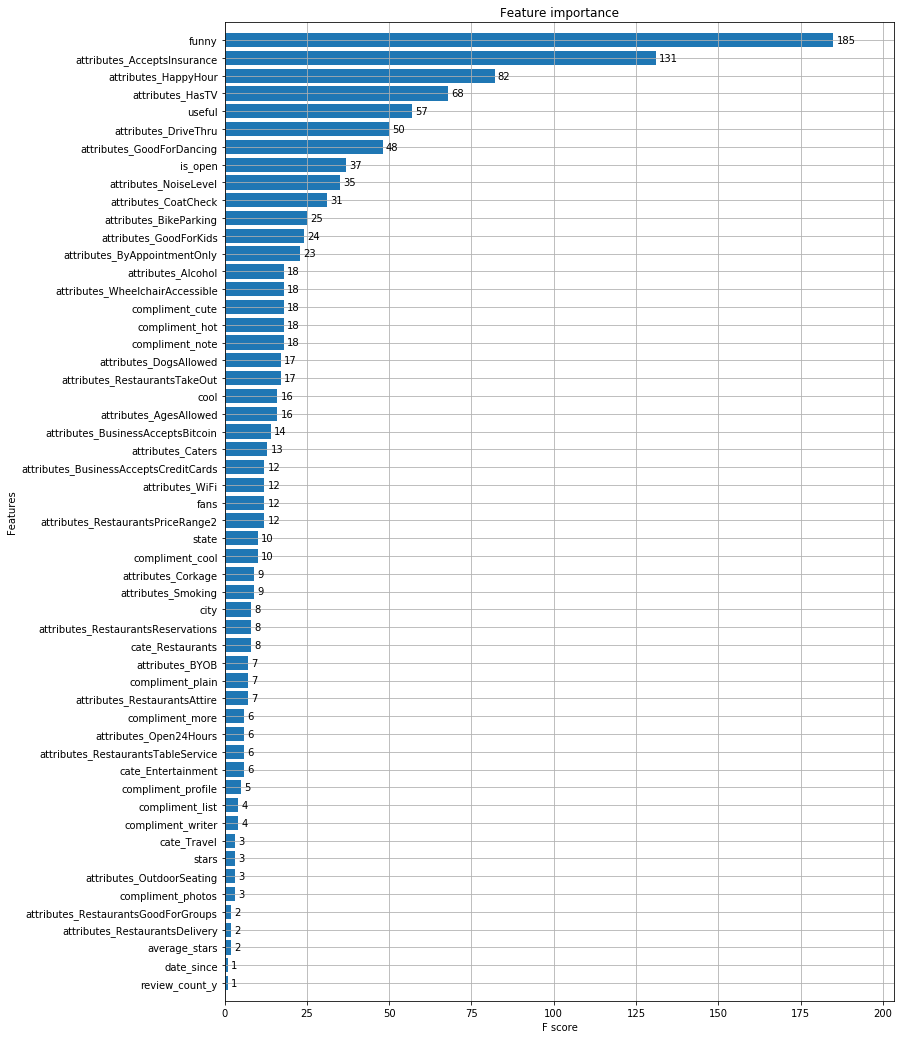

In [6]:
fig, ax = plt.subplots(figsize=(12,18))
xgb.plot_importance(bst, max_num_features=100, height=0.8, ax=ax)
plt.show()

In [7]:
y_pred_val = bst.predict(data_val)
np.sqrt(mean_squared_error(y_val,y_pred_val))

1.266384940911214

In [8]:
from sklearn.ensemble import ExtraTreesRegressor,GradientBoostingRegressor,RandomForestRegressor

ext = ExtraTreesRegressor(n_estimators=100,max_depth=4)
ext.fit(X_train,y_train)
y_ext_val = ext.predict(X_val)
print ("Ext", np.sqrt(mean_squared_error(y_val,y_ext_val)))

rf = RandomForestRegressor(max_depth=4,n_estimators=100)
rf.fit(X_train,y_train)
y_rf_val = rf.predict(X_val)
print ("RF", np.sqrt(mean_squared_error(y_val,y_rf_val)))

gbt = GradientBoostingRegressor(n_estimators=100,max_depth=4)
gbt.fit(X_train,y_train)
y_gbt_val = gbt.predict(X_val)
print ("gbt", np.sqrt(mean_squared_error(y_val,y_gbt_val)))

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Ext 1.266350775314611


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


RF 1.2662704669366815


/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


gbt 1.2675656468989147


In [9]:
from sklearn.linear_model import LinearRegression,Ridge

lr = LinearRegression()
lr.fit(X_train,y_train)
y_lr_val = lr.predict(X_val)
print ("lr", np.sqrt(mean_squared_error(y_val,y_lr_val)))

ridge = Ridge()
ridge.fit(X_train,y_train)
y_ridge_val = ridge.predict(X_val)
print ("ridge", np.sqrt(mean_squared_error(y_val,y_ridge_val)))


lr 1.2659637234545698
ridge 1.2659636955026454


In [10]:
y_ensemble = (pd.DataFrame(y_pred_val) + pd.DataFrame(y_ext_val) + pd.DataFrame(y_gbt_val)
              + pd.DataFrame(y_rf_val) + pd.DataFrame(y_lr_val) + pd.DataFrame(y_ridge_val))/6
np.sqrt(mean_squared_error(y_val,y_ensemble))

1.2661686197461004

In [11]:
X_new = pd.concat([X_train,X_val])
y_new = pd.concat([y_train,y_val])
dnew = xgb.DMatrix(X_new, label=y_new,feature_names=features)

watchlist = [(dnew, 'train'), (data_val, 'val')]
bst2 = xgb.train(xgb_pars, dnew, num_boost_round=158,early_stopping_rounds=10, evals=watchlist)
y_pred = bst2.predict(data_test)

ext = ExtraTreesRegressor(n_estimators=100,max_depth=4)
ext.fit(X_new,y_new)
y_ext_pred = ext.predict(X_test)

rf = RandomForestRegressor(max_depth=4,n_estimators=100)
rf.fit(X_new,y_new)
y_rf_pred = rf.predict(X_test)

gbt = GradientBoostingRegressor(n_estimators=100,max_depth=4)
gbt.fit(X_new,y_new)
y_gbt_pred = gbt.predict(X_test)

lr = LinearRegression()
lr.fit(X_new,y_new)
y_lr_pred = lr.predict(X_test)

ridge = Ridge()
ridge.fit(X_new,y_new)
y_ridge_pred = ridge.predict(X_test)


[0]	train-rmse:3.34185	val-rmse:3.44519
Multiple eval metrics have been passed: 'val-rmse' will be used for early stopping.

Will train until val-rmse hasn't improved in 10 rounds.
[1]	train-rmse:3.19612	val-rmse:3.29996
[2]	train-rmse:3.05869	val-rmse:3.16283
[3]	train-rmse:2.92905	val-rmse:3.03362
[4]	train-rmse:2.8069	val-rmse:2.91189
[5]	train-rmse:2.69198	val-rmse:2.79718
[6]	train-rmse:2.5838	val-rmse:2.68941
[7]	train-rmse:2.4821	val-rmse:2.58797
[8]	train-rmse:2.38666	val-rmse:2.49278
[9]	train-rmse:2.2971	val-rmse:2.40341
[10]	train-rmse:2.21312	val-rmse:2.31963
[11]	train-rmse:2.13448	val-rmse:2.24135
[12]	train-rmse:2.06092	val-rmse:2.16798
[13]	train-rmse:1.99225	val-rmse:2.09969
[14]	train-rmse:1.92816	val-rmse:2.03593
[15]	train-rmse:1.86846	val-rmse:1.97638
[16]	train-rmse:1.81295	val-rmse:1.92102
[17]	train-rmse:1.76131	val-rmse:1.86951
[18]	train-rmse:1.7133	val-rmse:1.82171
[19]	train-rmse:1.66881	val-rmse:1.77724
[20]	train-rmse:1.62762	val-rmse:1.73609
[21]	train-rm

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [12]:
y_ensemble = (pd.DataFrame(y_pred) + pd.DataFrame(y_ext_pred) + pd.DataFrame(y_gbt_pred)
              + pd.DataFrame(y_rf_pred) + pd.DataFrame(y_lr_pred) + pd.DataFrame(y_ridge_pred))/6


In [13]:
sample_submission = pd.read_csv("../data/sample_submission.csv")

sample_submission['stars'] = pd.DataFrame(y_ensemble)
sample_submission.to_csv("../data/submission4.csv",index=None)

In [14]:
pd.read_csv()

,index,stars
0,0,3.824396
1,1,3.816395
2,2,3.779746
3,3,3.785351
4,4,3.789739
5,5,3.806581
6,6,3.804587
7,7,3.766195
8,8,3.810061
9,9,3.787671


In [ ]:
y